In [1401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import GridSearchCV

train = pd.read_csv("heart_failure_clinical_records_dataset.csv")

## Understanding Data

In [1403]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [1404]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Description of Features

**Age** - Age of the patient 


**Anaemia** - Describe if the patient having decrease of red blood cells or hemoglobin (*boolean*)

**Creatinine_phosphokinase** - Describe the level of the CPK enzyme in the blood (mcg/L)

**Diabetes** - Describe if the patient has diabetes (*boolean*)

**Ejection_fraction** - Describe the percentage of blood leaving the heart at each contraction (percentage)

**High_blood_pressure** - Describe if the patient has hypertension (*boolean*)

**Platelets** - Describe the amount of platelets in the blood (kiloplatelets/mL)

**Serum_creatinine** - Describe the level of serum creatinine in the blood (mg/dL)

**Serium_sodium** - Describe the level of serum sodium in the blood (mEq/L)

**Sex** - Describe the patient is a Woman or Man (binary)

**Smoking** - Describe if the patient has smoke habbit (*boolean*)

**Time** - Follow-up period after confirmed case (days)

**Death-Event** - Describe if the patient deceased during the follow-up period (*boolean*)

#### Boolean features
        * Sex - Gender of patient Male = 1, Female =0
        * Diabetes - 0 = No, 1 = Yes
        * Anaemia - 0 = No, 1 = Yes
        * High_blood_pressure - 0 = No, 1 = Yes
        * Smoking - 0 = No, 1 = Yes
        * DEATH_EVENT - 0 = No, 1 = Yes

In [1408]:
##Showing Header of the dataset
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [1409]:
##Measures Information related to the dataset
train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Detemine whether there is null value in the datasets

In [1411]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [1412]:
## Check for outliers in the ejection fraction from the boxplot graph above
ejc_frac = 'ejection_fraction'
Q1 = train[ejc_frac].quantile(0.25)
Q3 = train[ejc_frac].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train[(train[ejc_frac] < lower_bound) | (train[ejc_frac] > upper_bound)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


 Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.

 Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that

 exist within each feature, removing outliers becomes tricky.

 During the research we found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 

 They are actual data points that helps in predicting DEATH_EVENT. 

### EDA 

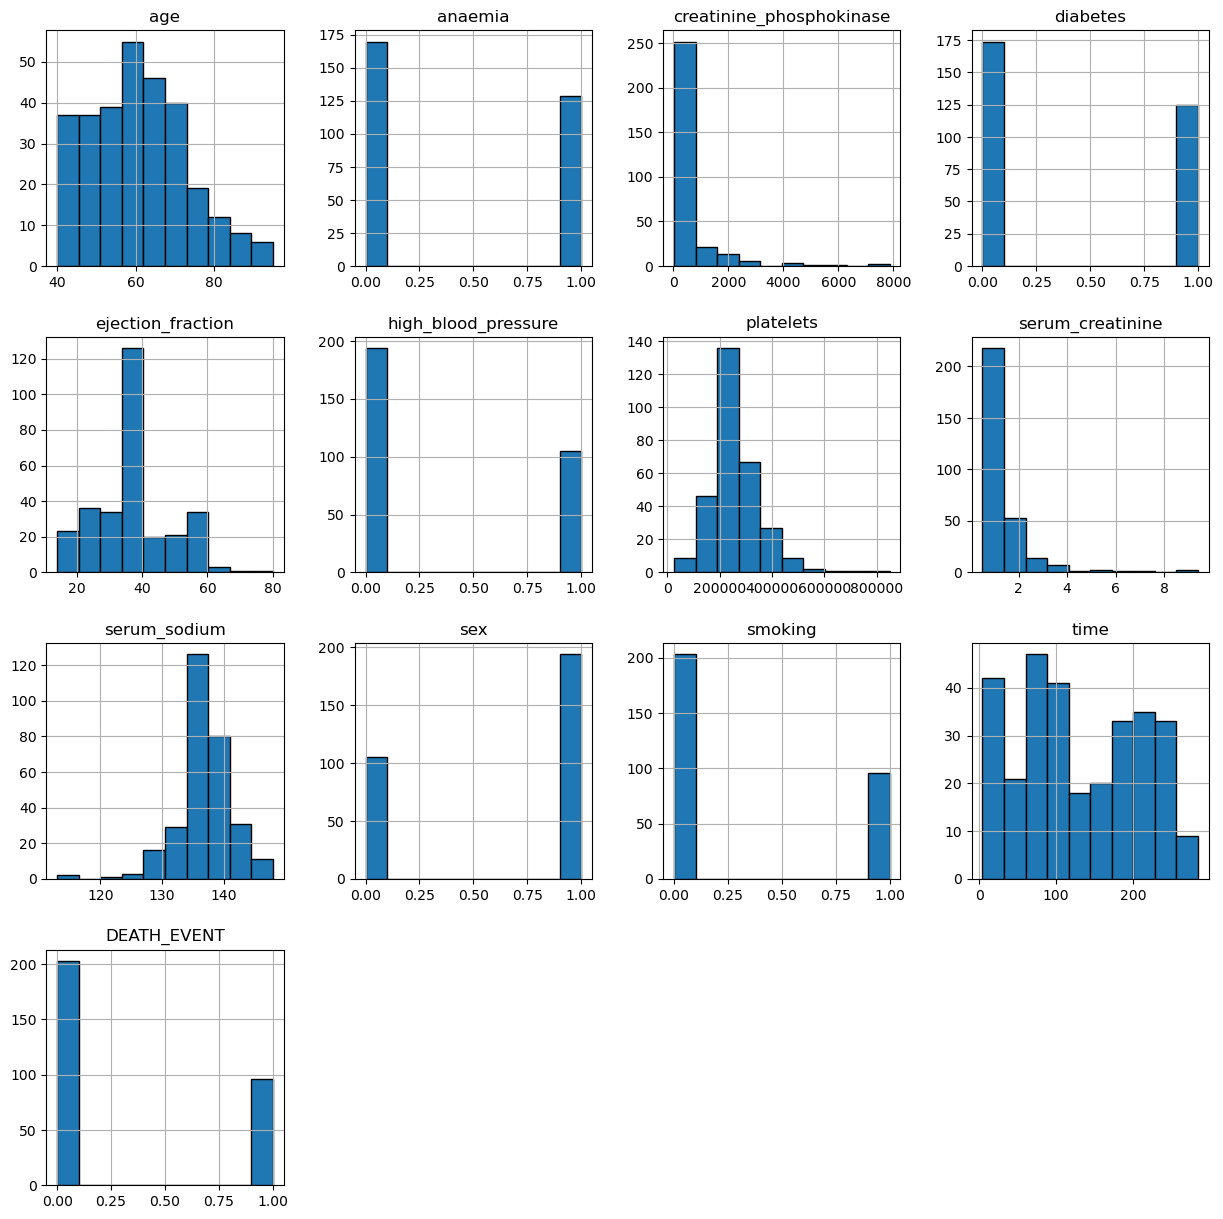

In [1415]:
train.hist(figsize=(15,15),edgecolor='black');

### The Relationship Between Our Datas: ***Age vs Death_Event***

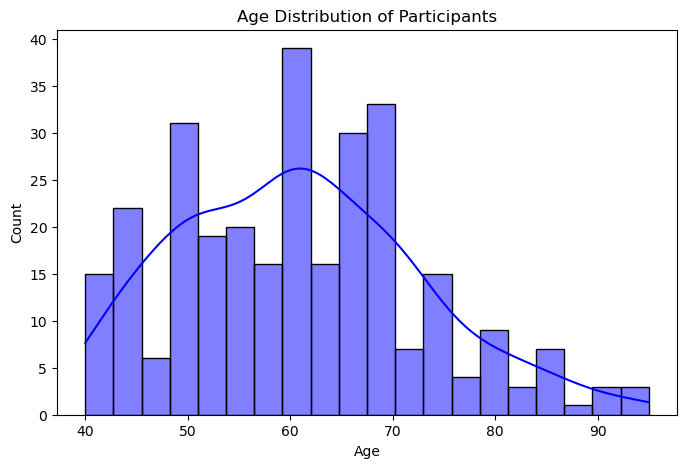

In [1417]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(train['age'], bins=20, kde=True, color='blue')  # KDE adds a smooth distribution line
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Participants")
plt.show()

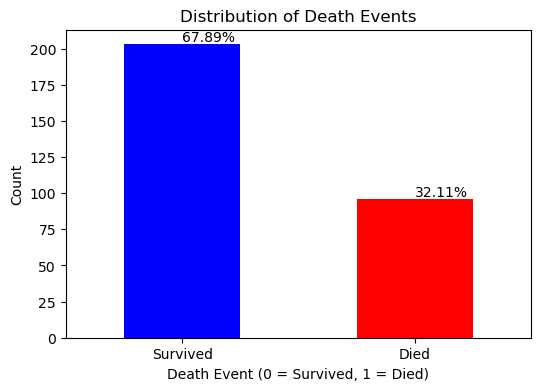

In [1418]:
# Count the occurrences of each class
death_counts = train['DEATH_EVENT'].value_counts()

# Calculate percentages
total = death_counts.sum()
percentages = (death_counts / total) * 100

# Plot the distribution
plt.figure(figsize=(6, 4))
bars = death_counts.plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Survived', 'Died'], rotation=0)
plt.xlabel("Death Event (0 = Survived, 1 = Died)")
plt.ylabel("Count")
plt.title("Distribution of Death Events")

# Add text annotations for percentages
for bar, percentage in zip(bars.containers[0], percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', va='bottom')  # va: vertical alignment

plt.show()

### The graph shows that the data is imbalanced with more survivors(0) than deceased(1) 

In [1420]:
import plotly.express as px

fig = px.histogram(train, x="age", color="DEATH_EVENT",
                   hover_data=train.columns,
                   title="Distribution of Age Vs Death Event",
                   labels={"age": "Age", "DEATH_EVENT": "Death Event (0 = Survived, 1 = Died)"},
                   template="plotly",
                   color_discrete_map={0: 'blue', 1: 'red'}  # Optional: to control color
                  )
fig.show()


### The Relationship Between Our Datas: ***Sex vs Death_Event***

<Axes: ylabel='count'>

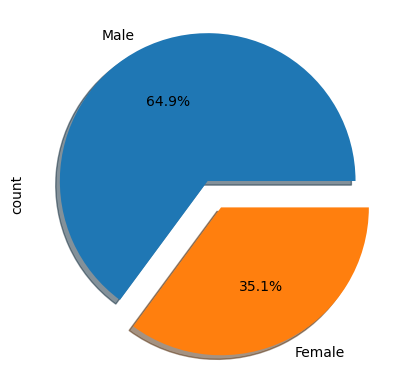

In [1422]:
train.sex.value_counts().plot.pie(
    explode=[0.1, 0.1], 
    autopct='%1.1f%%', 
    shadow=True, 
    labels=['Male', 'Female']
)

In [1423]:
len_data = len(train)
len_w = len(train[train["sex"]==0])
len_m = len_data - len_w

men_died = len(train.loc[(train["DEATH_EVENT"]==1) &(train['sex']==0)])
men_survived = len_m - men_died

women_died = len(train.loc[(train["DEATH_EVENT"]==1) & (train['sex']==1)])
women_survived = len_w - women_died

labels = ['Men died','Men survived','Women died','Women survived']
values = [men_died, men_survived, women_died, women_survived]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of DEATH EVENT according to their gender")
fig.show()

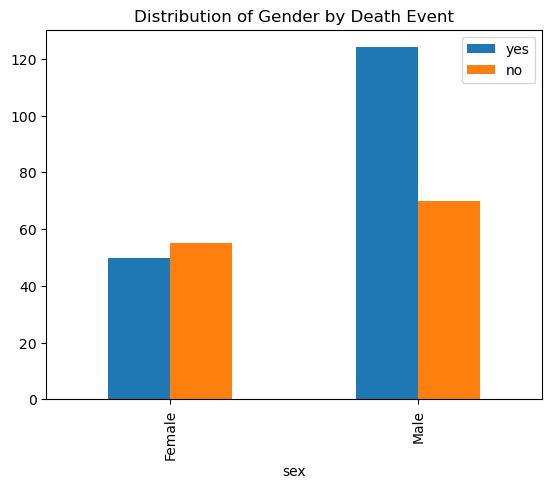

In [1424]:
pd.crosstab(train.sex ,train.diabetes).plot(kind='bar')
plt.title('Distribution of Gender by Death Event')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(['yes','no'])

### The Relationship Between Our Datas: ***Diabetes vs Death_Event***

/var/folders/80/22k9sbl17w7gx2nkwnjct3qm0000gn/T/ipykernel_63384/2662409115.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



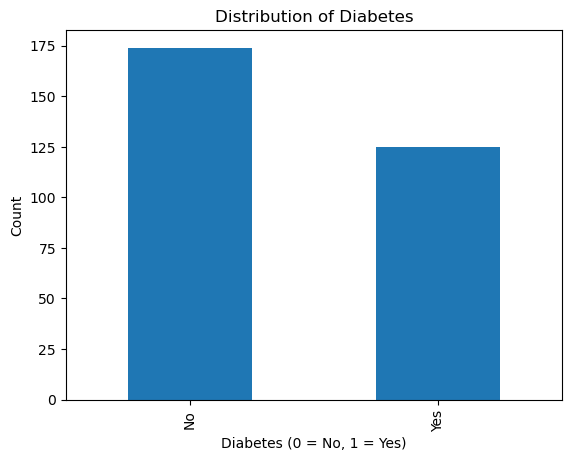

In [1426]:
pd.value_counts(train.diabetes).plot(kind='bar')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

##### The Count on Our Datas: ***Diabetes vs Sex***

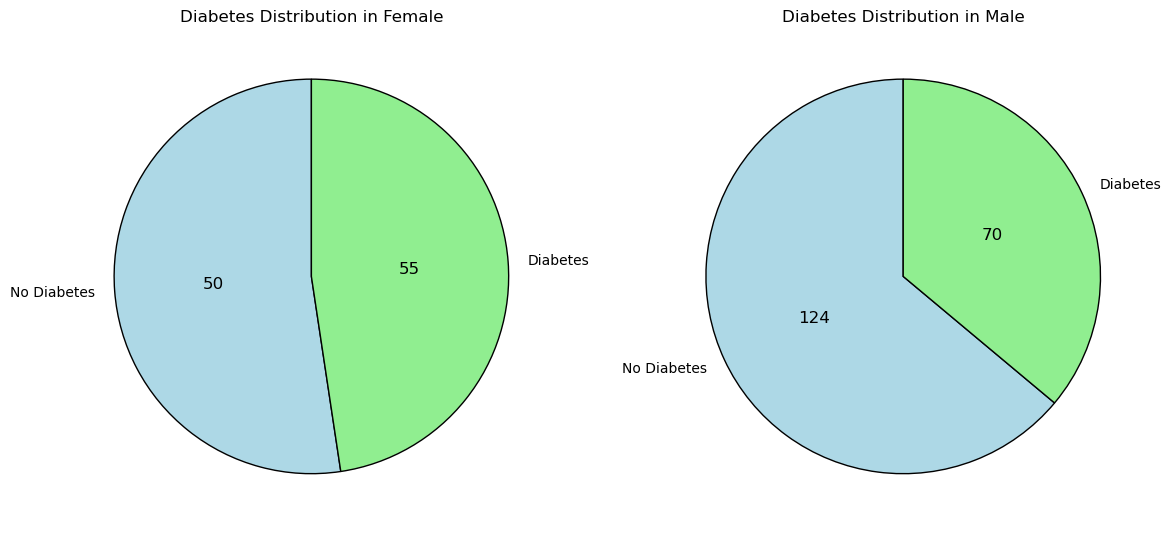

In [1428]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
# Assuming 'sex' is coded as 0 for females and 1 for males
for i, sex in enumerate(['Female', 'Male']):
    ax = axes[i]
    counts = train[train['sex'] == i]['diabetes'].value_counts()
    # Create the pie chart without percentages
    wedges, texts = ax.pie(
        counts, 
        labels=['No Diabetes', 'Diabetes'], 
        startangle=90, 
        colors=['lightblue', 'lightgreen'],
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(f'Diabetes Distribution in {sex}')
    
    # Add the count numbers inside the pie chart
    for j, wedge in enumerate(wedges):
        # Calculate the angle for each wedge
        angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        # Place text closer to the center of the wedge
        x = wedge.r * 0.5 * np.cos(np.radians(angle))  # Move the text inside
        y = wedge.r * 0.5 * np.sin(np.radians(angle))
        ax.text(
            x, y, f'{counts[j]}', 
            ha='center', va='center', 
            fontsize=12, color='black'
        )

plt.show()


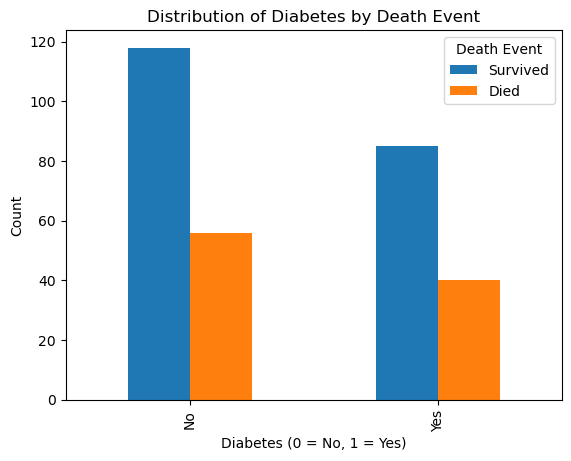

In [1429]:
pd.crosstab(train.diabetes ,train.DEATH_EVENT).plot(kind='bar')
plt.title('Distribution of Diabetes by Death Event')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Death Event', labels=['Survived', 'Died'])
plt.show()

### The Relationship Between Our Datas: ***Smokers vs Death_Event***

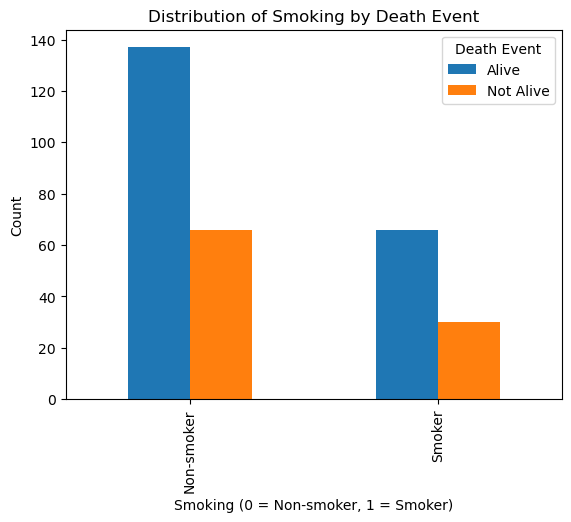

In [1431]:
pd.crosstab(train.smoking ,train.DEATH_EVENT).plot(kind='bar')
plt.title('Distribution of Smoking by Death Event')
plt.xlabel('Smoking (0 = Non-smoker, 1 = Smoker)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-smoker', 'Smoker'])
plt.legend(title='Death Event', labels=['Alive', 'Not Alive'])
plt.show()


### The Relationship Between Our Datas: ***Blood_Presure vs Death_Event***

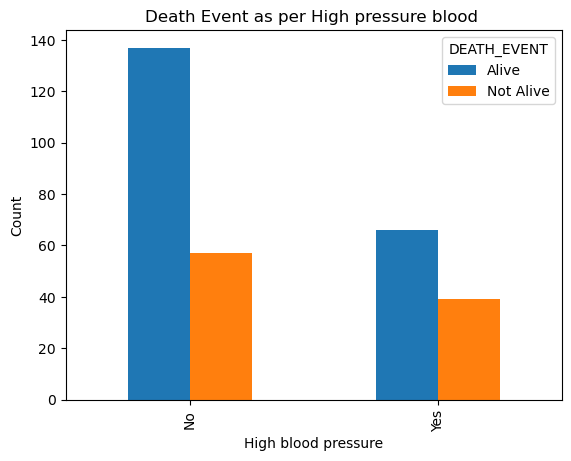

In [1433]:
pd.crosstab(train.high_blood_pressure ,train.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Alive', 'Not Alive'])
plt.title('Death Event as per High pressure blood ')
plt.xlabel('High blood pressure')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylabel('Count')
plt.show()

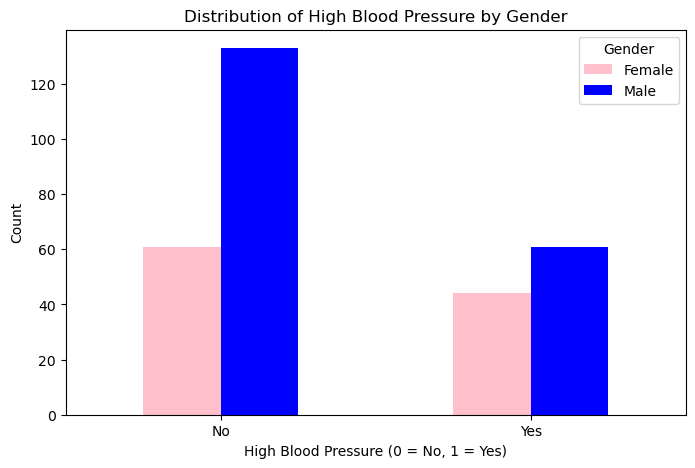

In [1434]:
# Create a crosstab to count occurrences of high blood pressure by gender
bp_gender_distribution = pd.crosstab(train['high_blood_pressure'], train['sex'])

# Plot the distribution
bp_gender_distribution.plot(kind='bar', figsize=(8, 5), color=['pink', 'blue'])
plt.title('Distribution of High Blood Pressure by Gender')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(['Female', 'Male'], title='Gender')
plt.show()

In [1435]:
fig = px.parallel_categories(train[binary_columns], color='DEATH_EVENT', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

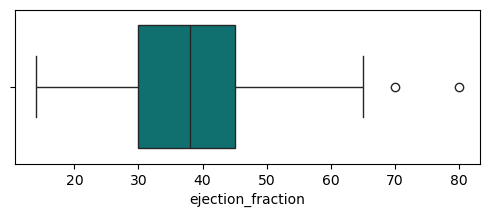

In [1436]:
plt.figure(figsize=( 6, 2))
sns.boxplot(x = train.ejection_fraction, color = 'teal')
plt.show()

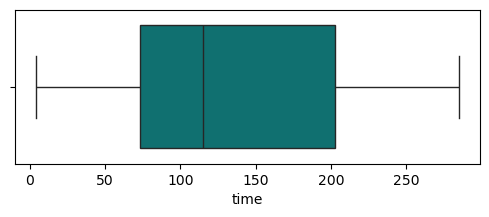

In [1437]:
plt.figure(figsize=( 6, 2 ))
sns.boxplot(x=train.time, color = 'teal')
plt.show()

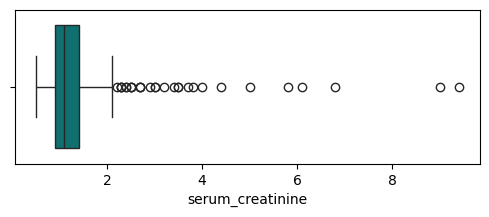

In [1438]:
plt.figure(figsize=( 6, 2 ))
sns.boxplot(x=train.serum_creatinine, color = 'teal')
plt.show()

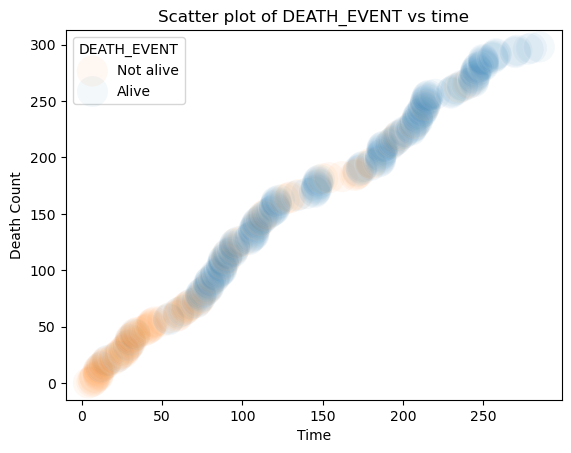

In [1439]:
sns.scatterplot(x = train.time, y = train.index, hue = train.DEATH_EVENT,alpha = .05, s = 500)
plt.legend(title='DEATH_EVENT', loc='upper left', labels=['Not alive', 'Alive'])
plt.title('Scatter plot of DEATH_EVENT vs time')
plt.xlabel('Time')
plt.ylabel('Death Count')
plt.show()

Through the scatter plot above, we can realise that there are a positive relationship between the time (days after dianosed symtomps) and the death event.

The death count is high during the first 75 days (approximately), then there is another dangerous period arround 125 to 175 days 
:- (althought there are quite a number of alives arround day 150).

This indicates that the patients have to be special cares and observe under the medical team for atleast 75(approximate) days after they are being dignosed to ensure any emergency action able to be taken base on their life habbit and their body health condition.

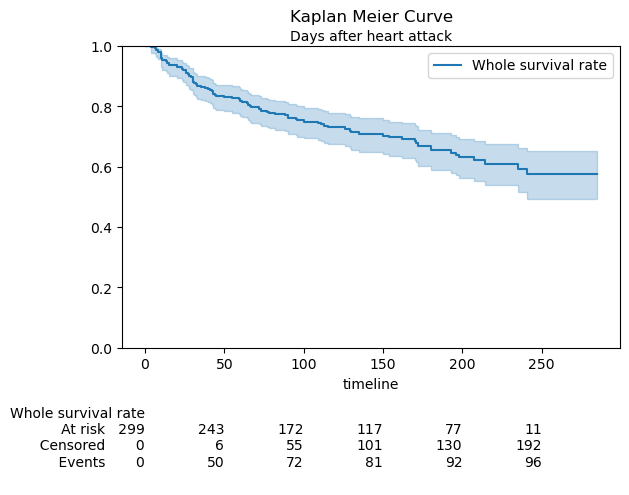

In [1441]:
kmf = KaplanMeierFitter()

ax = plt.subplot(111)

X = train.time
Y = train.DEATH_EVENT

kmf.fit(X, event_observed = Y, label = 'Whole survival rate')

kmf.plot(ax = ax,at_risk_counts=True)
plt.title("Kaplan Meier Curve")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival rate")
plt.ylim([0,1])
plt.show()

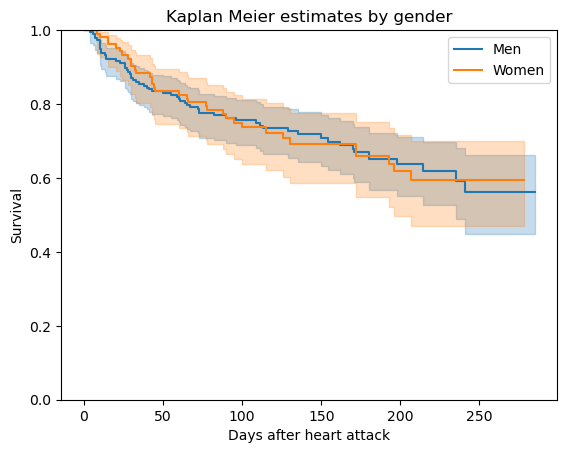

In [1442]:
ax = plt.subplot(111)
X = train[train.sex==1].time
Y = train[train.sex==1].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Men')
kmf.plot(ax = ax)
X = train[train.sex==0].time
Y = train[train.sex==0].DEATH_EVENT
kmf.fit(X, event_observed = Y, label = 'Women')
kmf.plot(ax = ax)
plt.title("Kaplan Meier estimates by gender")
plt.xlabel("Days after heart attack")
plt.ylabel("Survival")
plt.ylim([0,1])
plt.show()

### "Time" Feature in Model Training 
    using time allows the model to unfairly "peek into the future" inflating performance metrics. 
    in reality wont have time input 

    "Time" must be treated as an outcome (dependent variable), not as a predictor. Clinical features like hypertension or diabetes impact survival but don’t fully explain all deaths independently.

### Data Preprocessing

### **Skewness**

A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean:

    (-0.5, 0.5) — low or approximately symmetric.
    (-1, -0.5) U (0.5, 1) — moderately skewed.
    Beyond -1 and 1 — Highly skewed.

In [1446]:
from scipy.stats import skew
#numerical columns exclude time and age
# continuous_columns = ['ejection_fraction', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets', 'serum_sodium']
data_columns = train.select_dtypes(include=[np.number]).columns.tolist()
binary_columns = [col for col in train.columns if train[col].nunique() == 2]
continuous_columns = [col for col in data_columns if col not in binary_columns + ['time', 'age']]

skewness_values = [skew(train[col].dropna()) for col in continuous_columns]
skewness_table = pd.DataFrame({'Feature': continuous_columns, 'Skewness': skewness_values})

skewness_table.head()


,Feature,Skewness
0,creatinine_phosphokinase,4.440689
1,ejection_fraction,0.552593
2,platelets,1.454975
3,serum_creatinine,4.433610
4,serum_sodium,-1.042870


Based on the calculated skewness values:

***Ejection fraction*** is approximately symmetric, with a moderately skewness of **0.55** (within the acceptable range of (-1, -0.5) and (0.5, 1)).

***Serum creatinine*** and ***creatinine phosphokinase*** are **highly right-skewed**, indicating the presence of extreme high values.

***Platelets*** is **moderately right-skewed**, also suggesting some concentration of lower values with a long tail on the right.

***Serium sodium*** is **left-skewed**, indicating a longer tail towards the lower values.

Thus it is needs to carried out transformation of skew

In [1448]:
# List of features to check : highly skewed features
##columns_to_check = ['creatinine_phosphokinase', 'serum_creatinine', 'platelets']
columns_to_check_skewness = [col for col in continuous_columns if abs(train[col].skew()) > 1 or abs(train[col].skew()) < -1]
columns_to_check_high_right_skew = [col for col in continuous_columns if train[col].skew() > 1]
columns_to_check_high_left_skew = [col for col in continuous_columns if train[col].skew() < -1]

zero_counts_rs = {col: (train[col] == 0).sum() for col in columns_to_check_skewness}
zero_counts_dfrs = pd.DataFrame.from_dict(zero_counts_rs, orient='index', columns=['Number of Zeros'])


zero_counts_dfrs.head()



,Number of Zeros
creatinine_phosphokinase,0
platelets,0
serum_creatinine,0
serum_sodium,0


After studied on the data we found that Box-Cox is suitable in this case as there is no values that is negative and zero based on the chart and the read of data. Box-Cox able to find the best transformation for normality

In [1450]:
from sklearn.preprocessing import PowerTransformer

# Initialize transformer with Box-Cox
pt = PowerTransformer(method='box-cox')

# Apply on selected columns
# columns_to_check = ['creatinine_phosphokinase', 'serum_creatinine', 'platelets']
train[columns_to_check_high_right_skew] = pt.fit_transform(
    train[columns_to_check_high_right_skew]
)

# Apply square transformation for left-skewed feature
train[columns_to_check_high_left_skew] = np.square(train[columns_to_check_high_left_skew])

adjusted_skewness_values = [train[col].skew() for col in columns_to_check_high_right_skew + columns_to_check_high_left_skew]
skew_table = pd.DataFrame({
    'Feature': columns_to_check_high_right_skew + columns_to_check_high_left_skew + ['ejection_fraction'],
    'New Skewness': adjusted_skewness_values + [train['ejection_fraction'].skew()]
})

skew_table.head()

,Feature,New Skewness
0,creatinine_phosphokinase,0.042638
1,platelets,0.155362
2,serum_creatinine,0.021353
3,serum_sodium,-0.811175
4,ejection_fraction,0.555383


### Correlation between continuos variables

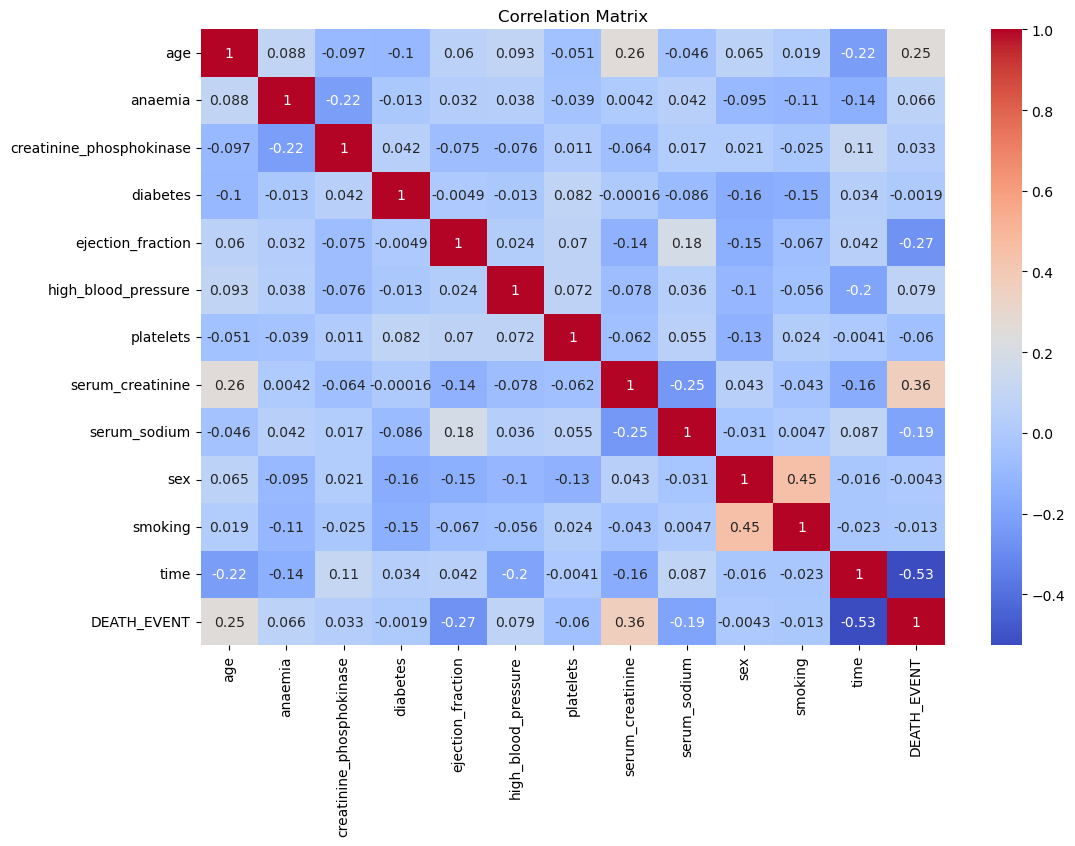

In [1452]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Chi square test is carried out to determine whether the binary categorical variables are related
    
    since most of the column is binary data where only 0 or 1, a chi-square test is appropriate to evaluate the independence between the variables.

In [1454]:
from scipy.stats import chi2_contingency

print("Binary Categorical Variables vs DEATH_EVENT\n")
chi2_results = []

for var in [col for col in binary_columns if col != 'DEATH_EVENT']:
    contingency_table = pd.crosstab(train[var], train['DEATH_EVENT'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        "Variable": var,
        "Chi-squared": chi2,
        "P-value": p_value,
        "Degrees of Freedom": dof
    }
)
chi2_results_df = pd.DataFrame(chi2_results)

chi2_results_df

Binary Categorical Variables vs DEATH_EVENT



,Variable,Chi-squared,P-value,Degrees of Freedom
0,anaemia,1.042175,0.307316,1
1,diabetes,0.000000,1.000000,1
2,high_blood_pressure,1.543461,0.214103,1
3,sex,0.000000,1.000000,1
4,smoking,0.007331,0.931765,1


### None of the variables shows a statiscally significant association with Death Event based on CHI-Square test

Chi Square Test to check the relationship between features and features

In [1457]:
from scipy.stats import chi2_contingency
from itertools import combinations
import pandas as pd

# Replace this with your actual DataFrame and categorical variable list
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']  # example list

chi2_feature_results = []

# Loop through all unique feature pairs (excluding target)
for var1, var2 in combinations(categorical_features, 2):
    contingency_table = pd.crosstab(train[var1], train[var2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    chi2_feature_results.append({
        "Feature 1": var1,
        "Feature 2": var2,
        "Chi-Squared": round(chi2, 4),
        "P-Value": round(p_value, 4),
        "Degrees of Freedom": dof,
        "Significant (p < 0.05)": "Yes" if p_value < 0.05 else "No"
    })

# Convert to DataFrame
chi2_feature_df = pd.DataFrame(chi2_feature_results)

# Optional: sort by p-value
chi2_feature_df = chi2_feature_df.sort_values(by="P-Value")

# Display results
print(chi2_feature_df.to_string(index=False))


          Feature 1           Feature 2  Chi-Squared  P-Value  Degrees of Freedom Significant (p < 0.05)
                sex             smoking      57.4631   0.0000                   1                    Yes
           diabetes                 sex       6.7839   0.0092                   1                    Yes
           diabetes             smoking       5.8530   0.0156                   1                    Yes
            anaemia             smoking       2.9935   0.0836                   1                     No
high_blood_pressure                 sex       2.8293   0.0926                   1                     No
            anaemia                 sex       2.2995   0.1294                   1                     No
high_blood_pressure             smoking       0.6949   0.4045                   1                     No
            anaemia high_blood_pressure       0.2894   0.5906                   1                     No
            anaemia            diabetes       0.0104   

### Feature Selection

In [1459]:
from sklearn.model_selection import train_test_split

X = train.drop(['time', 'DEATH_EVENT'], axis=1) # Features
y = train['DEATH_EVENT']  # Target variable
features_names = X.columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [1460]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

Feature ranking:
1. feature 7 (0.180779) serum_creatinine
2. feature 4 (0.167529) ejection_fraction
3. feature 0 (0.135556) age
4. feature 8 (0.116387) serum_sodium
5. feature 2 (0.106216) creatinine_phosphokinase
6. feature 6 (0.105565) platelets
7. feature 3 (0.046101) diabetes
8. feature 9 (0.038883) sex
9. feature 10 (0.037662) smoking
10. feature 1 (0.033936) anaemia
11. feature 5 (0.031386) high_blood_pressure


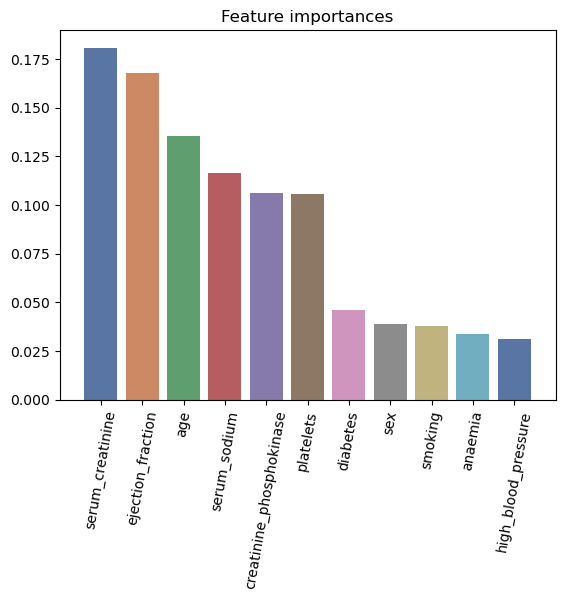

In [1461]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], features_names[indices[f]]))

plt.figure()
plt.title("Feature importances")
sns.barplot(x=features_names[indices].to_numpy(), y=importances[indices], palette="deep", hue=features_names[indices].to_numpy(), dodge=False, legend=False)
plt.xticks(range(X.shape[1]), features_names[indices].to_numpy(),rotation=80)
plt.xlim([-1, X.shape[1]])
plt.show()

Here we can visualize the most suitable variable to use for the training, and the 6 top most feature will be the selected features for the comming prediction model training's variable.

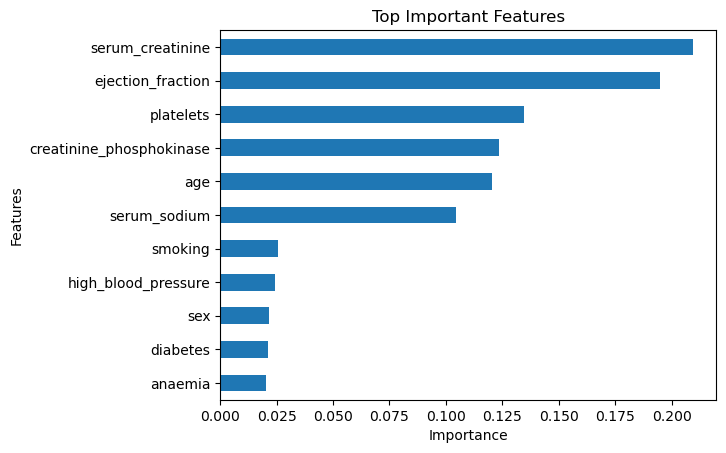

In [1463]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your training data
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# Visualizing feature importances
feat_importances = pd.Series(importances, index=X_train.columns)

# Sort the feature importances in ascending order before plotting
feat_importances_sorted = feat_importances.sort_values()

feat_importances_sorted.plot(kind='barh')
plt.title('Top Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


To support the evidence that Important Features accuracy is higher than the All Features we carried out comparing 

In [1465]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define feature sets
features_high_importance = ['serum_creatinine', 'ejection_fraction','platelets', 'creatinine_phosphokinase', 'age','serum_sodium']
features_full = X_train.columns.tolist()  # All features

# Dictionary to hold feature sets
feature_sets = {
    "High Importance": X_train[features_high_importance],
    "Full Set": X_train[features_full]
}

# Dictionary to store accuracies for comparison
accuracies = {}

# Training and evaluation
for name, features in feature_sets.items():
    model = RandomForestClassifier(random_state=42)
    model.fit(features, y_train)
    y_pred = model.predict(X_test[features.columns])
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"Accuracy with {name}: {accuracy:.2f}")

# Comparing accuracies
best_feature_set = max(accuracies, key=accuracies.get)
print(f"Best performing feature set: {best_feature_set} with an accuracy of {accuracies[best_feature_set]:.2f}")


Accuracy with High Importance: 0.75
Accuracy with Full Set: 0.70
Best performing feature set: High Importance with an accuracy of 0.75


##### "Based on feature importance analysis using the Random Forest model, the features _serum_creatinine_, _ejection_fraction_, _platelets_, _creatinine_phosphokinase_, _age_, and _serum_sodium_ are showing notably higher importance scores than other variables. 

#### Furthermore, these variables are clinically validated as relevant predictors for mortality in cardiovascular conditions. Thus, we opt to prioritize these features for the predictive model, ensuring model performance, interpretability, and clinical validity."

### SMOTE & AUGMENTATION

In [1468]:
train['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

Class distribution in y_train before SMOTE:
DEATH_EVENT
0    162
1     77
Name: count, dtype: int64


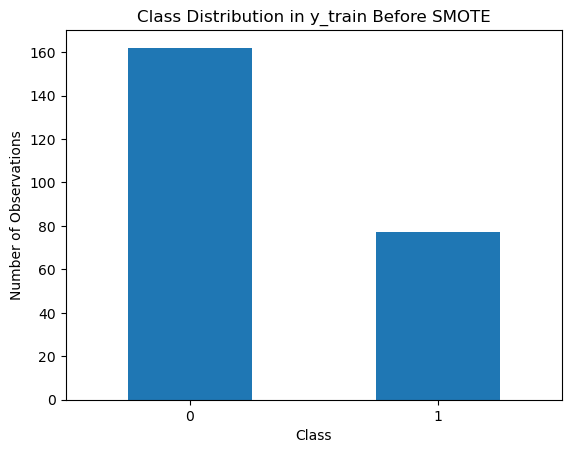

In [1469]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

# Step 1: Split data first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Class distribution in y_train before SMOTE:")
print(y_train.value_counts())

# Plotting the distribution of classes in y_train
y_train.value_counts().plot(kind='bar')
plt.figsize=(6, 4)
plt.title('Class Distribution in y_train Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Observations')
plt.xticks(rotation=0)
plt.show()

In [1470]:
# Step 2: Resample ONLY TRAINING DATA
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


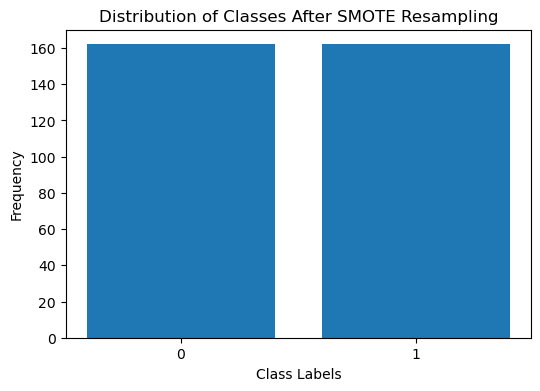

In [1471]:
labels, counts = np.unique(y_resampled, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, tick_label=labels)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Classes After SMOTE Resampling')
plt.show()

#### Why use SMOTE (Synthetic Minority Over-sampling techniques)
    creates new, synthetic examples based on existing data
    lower overfitting risk, due to synthetic diversity

Gaussian Noise Augmentation

In [1474]:
import numpy as np
import pandas as pd

# Step 1: Extract high-importance features
X_resampled_high_importance = X_resampled[features_high_importance]
X_test_high_importance = X_test[features_high_importance]

# Step 2: Print original shapes
print("Before Augmentation:")
print("X shape:", X_resampled_high_importance.shape)
print("y shape:", y_resampled.shape)

# Step 3: Create noise and augmented features
noise = np.random.normal(0, 0.01, X_resampled_high_importance.shape)
X_augmented = X_resampled_high_importance + noise

# Step 4: Combine original + augmented data (overwriting the original variable)
X_resampled_high_importance = pd.concat([
    pd.DataFrame(X_resampled_high_importance),
    pd.DataFrame(X_augmented)
], ignore_index=True)

# Step 5: Only duplicate y_resampled if it matches original (before augmentation)
if y_resampled.shape[0] == X_resampled_high_importance.shape[0] // 2:
    y_resampled = pd.concat([y_resampled, y_resampled], ignore_index=True)

# Step 6: Safety check
assert X_resampled_high_importance.shape[0] == y_resampled.shape[0], \
    "Mismatch: X and y must have the same number of samples!"

# Step 7: Final confirmation
print("After Augmentation:")
print("X shape:", X_resampled_high_importance.shape)
print("y shape:", y_resampled.shape)
print("Target class distribution:\n", y_resampled.value_counts())


Before Augmentation:
X shape: (324, 6)
y shape: (324,)
After Augmentation:
X shape: (648, 6)
y shape: (648,)
Target class distribution:
 DEATH_EVENT
0    324
1    324
Name: count, dtype: int64


## 2.0 Model Training

In this section, we train multiple machine learning models to predict the likelihood of a death event. Given the critical nature of the problem, where false negatives could have severe consequences, we prioritize the ``` RECALL ``` metric. A higher recall ensures that most of the actual death events are correctly identified, which is crucial in medical scenarios to minimize the risk of overlooking high-risk patients.

### 2.1 Random Forest Classifier with GridSearchCV

In [1477]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4, 5],
    'max_features': ['sqrt']
}

# Step 2: Create the classifier
rf = RandomForestClassifier(random_state=42)

# Step 3: Grid search ONLY on augmented high-importance features
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_resampled_high_importance, y_resampled)

print("Best Parameters (High-Importance Features):", grid_rf.best_params_)


Best Parameters (High-Importance Features): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Test Accuracy: 0.7
Test Precision: 0.709035409035409
Test Recall: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        41
           1       0.52      0.58      0.55        19

    accuracy                           0.70        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.71      0.70      0.70        60



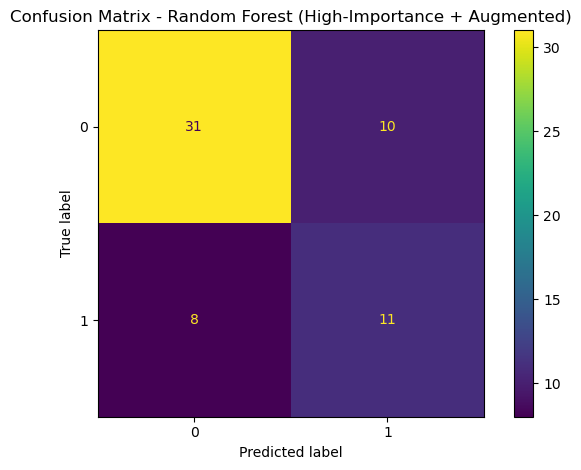

In [1478]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Best model from grid search
best_rf = grid_rf.best_estimator_

# Predictions
y_test_pred_rf = best_rf.predict(X_test_high_importance)
y_pred_train = best_rf.predict(X_resampled_high_importance)

# === Evaluation ===
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Test Precision:", precision_score(y_test, y_test_pred_rf, average='weighted'))
print("Test Recall:", recall_score(y_test, y_test_pred_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf)

plt.title("Confusion Matrix - Random Forest (High-Importance + Augmented)")
plt.grid(False)
plt.tight_layout()
plt.show()

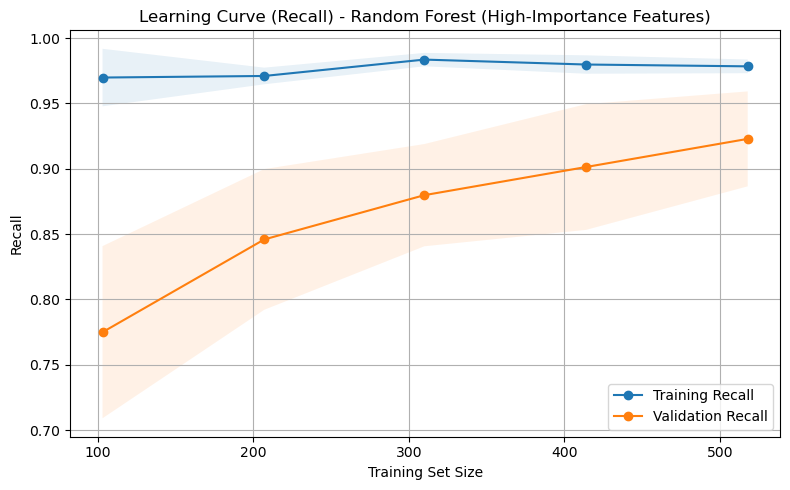

In [1479]:
from sklearn.model_selection import learning_curve
import numpy as np

# === Define sizes of training set to evaluate ===
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_rf,
    X=X_resampled_high_importance,
    y=y_resampled,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv=5,
    scoring='recall',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# === Compute means and standard deviations ===
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# === Plot the learning curve ===
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Recall")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Recall")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title("Learning Curve (Recall) - Random Forest (High-Importance Features)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


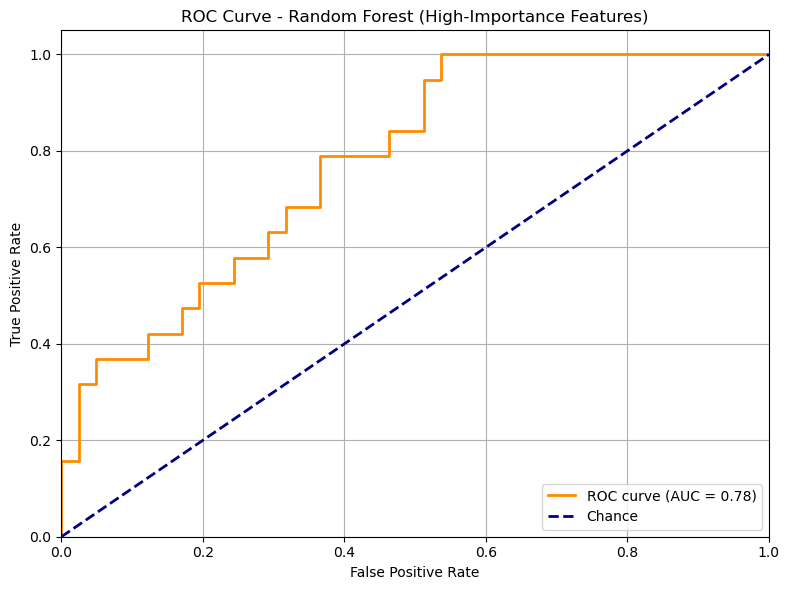

In [1480]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities for the positive class (class 1)
y_probs = best_rf.predict_proba(X_test_high_importance)[:, 1]

# Step 2: Compute FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 3: Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (High-Importance Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


##

### 2.2 Logistic Regression

#### Logistic Regression: Why Use It?

Logistic Regression is a widely used statistical method for binary classification problems, such as predicting the likelihood of a heart failure death event. It is particularly suitable for this dataset due to the following advantages:

- **Simplicity and Interpretability**: Logistic Regression is easy to implement and provides interpretable coefficients, making it ideal for understanding the relationship between clinical features and the target variable.

- **Handles Imbalanced Data**: With proper techniques like SMOTE, Logistic Regression can effectively handle imbalanced datasets, as seen in this workflow.

- **Efficient for Small Datasets**: Logistic Regression performs well on smaller datasets, requiring fewer computational resources compared to more complex models.

- **Probabilistic Predictions**: It provides probabilities for class membership, which can be useful for risk assessment in medical applications.

In [1484]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (lower = more regularization)
    'logreg__solver': ['liblinear', 'lbfgs'],  # Compatible solvers for L2 penalty
    'logreg__penalty': ['l2']
}

# Run grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_resampled_high_importance, y_resampled)

# Get best model
best_logreg = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_logreg.predict(X_resampled_high_importance)
y_test_pred_logreg = best_logreg.predict(X_test_high_importance)

# Evaluation
print("\nTuned Logistic Regression (High-Importance Features)")
print("Train Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_logreg))
print("Precision:", precision_score(y_test, y_test_pred_logreg, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred_logreg, average='weighted'))
print(classification_report(y_test, y_test_pred_logreg))


Best Hyperparameters: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}

Tuned Logistic Regression (High-Importance Features)
Train Accuracy: 0.7592592592592593
Test Accuracy: 0.6833333333333333
Precision: 0.721078431372549
Recall: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.50      0.68      0.58        19

    accuracy                           0.68        60
   macro avg       0.66      0.68      0.66        60
weighted avg       0.72      0.68      0.69        60



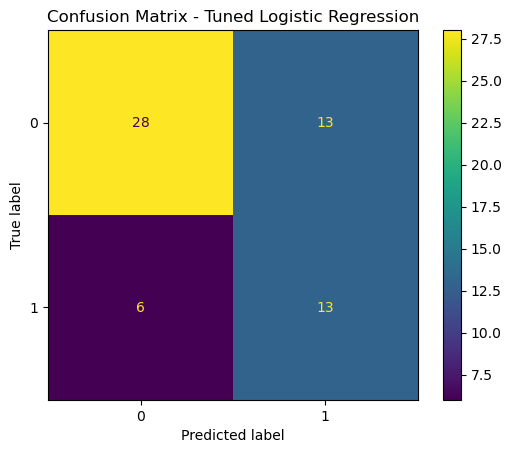

In [1485]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_logreg)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()

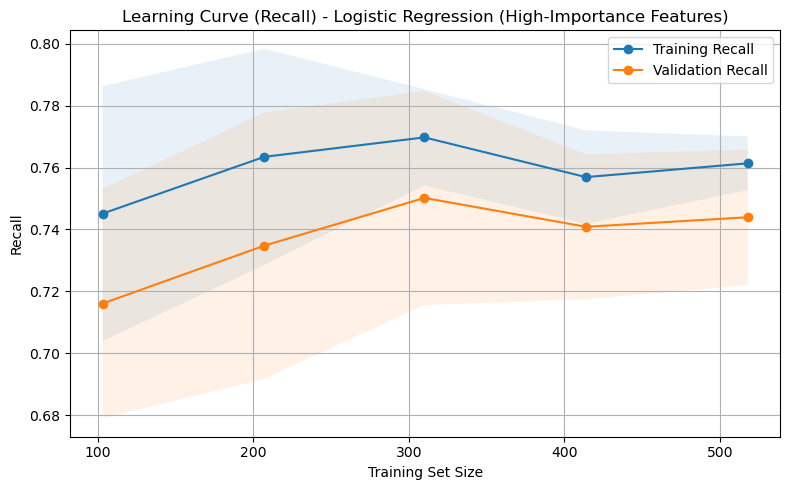

In [1486]:
# === Generate learning curve for logistic regression pipeline ===
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_logreg,
    X=X_resampled_high_importance,
    y=y_resampled,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv=5,
    scoring='recall',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# === Compute mean and std for plotting ===
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# === Plot the learning curve ===
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Recall")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Recall")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title("Learning Curve (Recall) - Logistic Regression (High-Importance Features)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

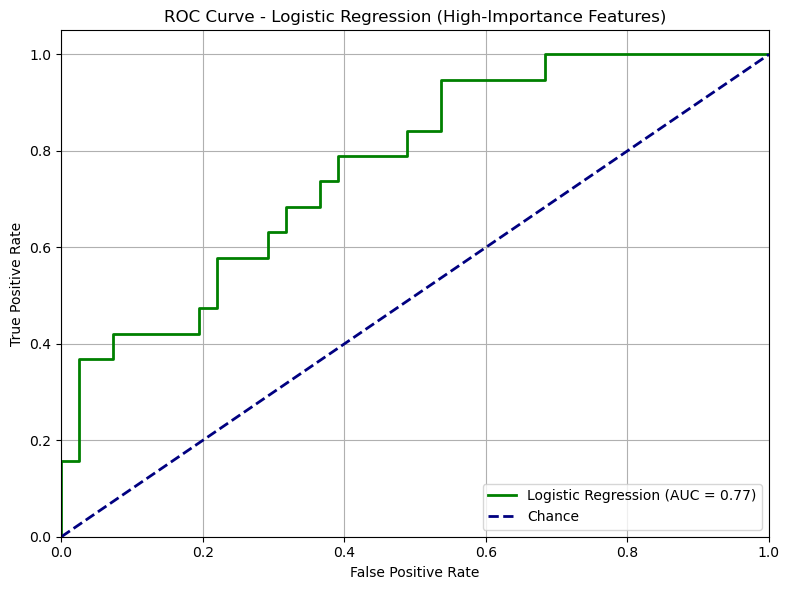

In [1487]:
from sklearn.metrics import roc_curve, auc

# Step 1: Get predicted probabilities for class 1
y_probs_logreg = best_logreg.predict_proba(X_test_high_importance)[:, 1]

# Step 2: Compute ROC curve and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (High-Importance Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3 XG BOOST Classifier

#### Why Choose XGBoost Classifier?

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm, particularly well-suited for structured/tabular data. It was chosen for this document due to the following reasons:

1. **High Performance**: XGBoost is known for its superior predictive accuracy and speed, making it ideal for complex datasets like this one.

2. **Handles Imbalanced Data**: With techniques like SMOTE applied, XGBoost can effectively handle class imbalance, ensuring fair predictions.

3. **Feature Importance**: XGBoost provides insights into feature importance, aiding in interpretability and feature selection.

4. **Regularization**: Built-in L1 and L2 regularization help prevent overfitting, ensuring better generalization on unseen data.

5. **Scalability**: XGBoost is highly scalable, capable of handling large datasets efficiently, which is crucial for real-world applications.

These advantages make XGBoost a robust choice for predicting heart failure death events, balancing accuracy, interpretability, and computational efficiency.

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}

XGBoost (High-Importance Features)
Train Accuracy: 0.9722222222222222
Test Accuracy: 0.7333333333333333
Precision: 0.7416361416361416
Recall: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.57      0.63      0.60        19

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.74      0.73      0.74        60



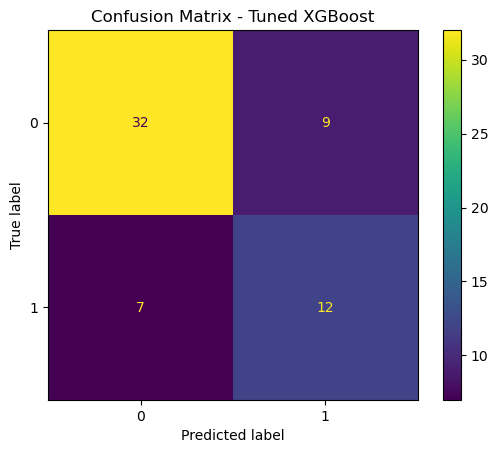

In [1490]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
# Define base model
xgb_base = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define parameter grid (you can expand this later if needed)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [2, 3]
}


# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_resampled_high_importance, y_resampled)

# Best model
best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions
y_train_pred_xg = best_xgb.predict(X_resampled_high_importance)
y_test_pred_xg = best_xgb.predict(X_test_high_importance)

# Evaluation
print("\nXGBoost (High-Importance Features)")
print("Train Accuracy:", accuracy_score(y_resampled, y_train_pred_xg))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_xg))
print("Precision:", precision_score(y_test, y_test_pred_xg, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred_xg, average='weighted'))
print(classification_report(y_test, y_test_pred_xg))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_xg)
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:49:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

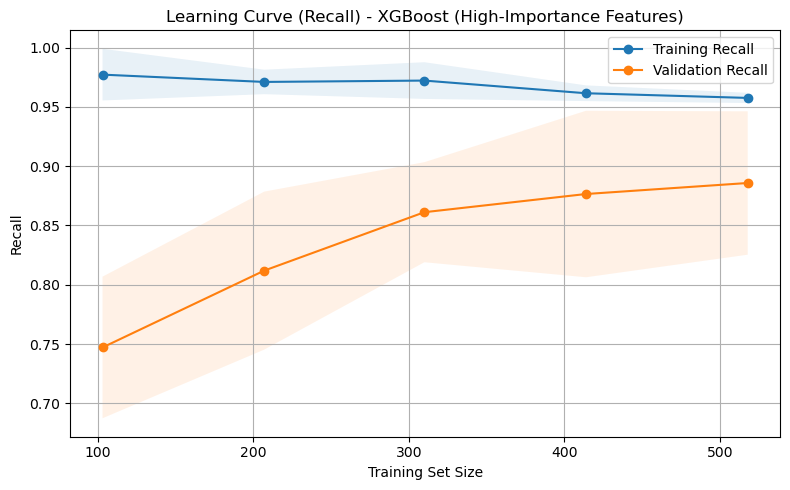

In [1491]:
from sklearn.model_selection import learning_curve
import numpy as np

# === Generate learning curve ===
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_xgb,
    X=X_resampled_high_importance,
    y=y_resampled,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv=5,
    scoring='recall',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# === Mean and std calculations ===
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Recall")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Recall")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title("Learning Curve (Recall) - XGBoost (High-Importance Features)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


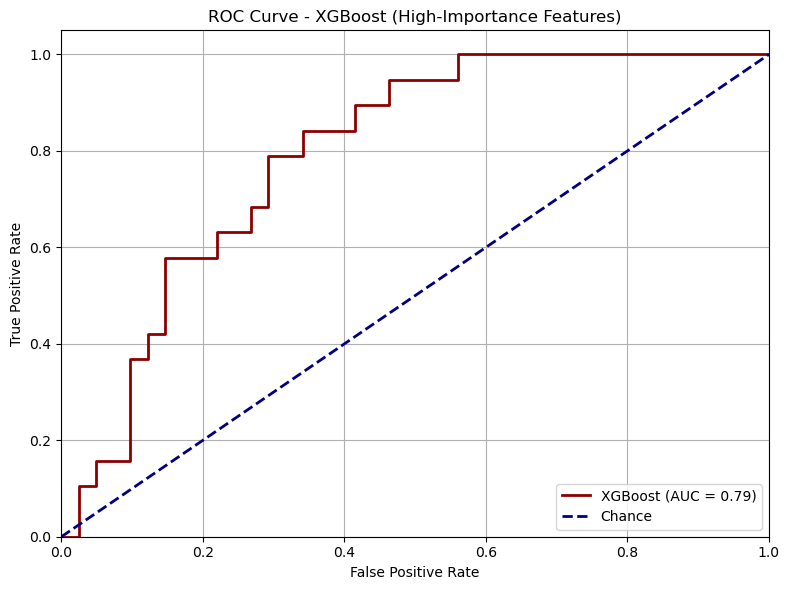

In [1492]:
from sklearn.metrics import roc_curve, auc

# Step 1: Get predicted probabilities for the positive class
y_probs_xg = best_xgb.predict_proba(X_test_high_importance)[:, 1]

# Step 2: Compute FPR, TPR, thresholds
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_probs_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xg, tpr_xg, color='darkred', lw=2, label=f'XGBoost (AUC = {roc_auc_xg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (High-Importance Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.4 Support Vector Classifier (SVC)

### Why Choose Support Vector Classifier (SVC)?

Support Vector Classifier (SVC) is a powerful machine learning algorithm, particularly effective for binary classification tasks. Its advantages include:

- **Robustness to Overfitting**: By maximizing the margin between classes, SVC reduces the risk of overfitting, especially in high-dimensional spaces.
- **Kernel Trick**: SVC supports various kernel functions (e.g., linear, RBF), enabling it to model complex, non-linear relationships in the data.
- **Effective with Small Datasets**: SVC performs well with smaller datasets where other algorithms might struggle.
- **Handles Imbalanced Data**: With proper class weighting, SVC can effectively handle imbalanced datasets.
- **Flexibility**: SVC is versatile and can be fine-tuned using hyperparameters like `C` (regularization) and `gamma` (kernel coefficient) to optimize performance.

In [1495]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'svm__C': [0.01, 0.1, 1],             # Stronger regularization
    'svm__gamma': [0.05, 0.1, 0.2]  
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_resampled_high_importance, y_resampled)

# Get the best model
best_svm = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_svm.predict(X_resampled_high_importance)
y_test_pred_svm = best_svm.predict(X_test_high_importance)

# Evaluation
print("\nTuned SVM (High-Importance Features + SMOTE)")
print("Train Accuracy:", accuracy_score(y_resampled, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Precision:", precision_score(y_test, y_test_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred_svm, average='weighted'))
print(classification_report(y_test, y_test_pred_svm))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'svm__C': 1, 'svm__gamma': 0.2}

Tuned SVM (High-Importance Features + SMOTE)
Train Accuracy: 0.8734567901234568
Test Accuracy: 0.6666666666666666
Precision: 0.7115600448933782
Recall: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        41
           1       0.48      0.68      0.57        19

    accuracy                           0.67        60
   macro avg       0.65      0.67      0.65        60
weighted avg       0.71      0.67      0.68        60



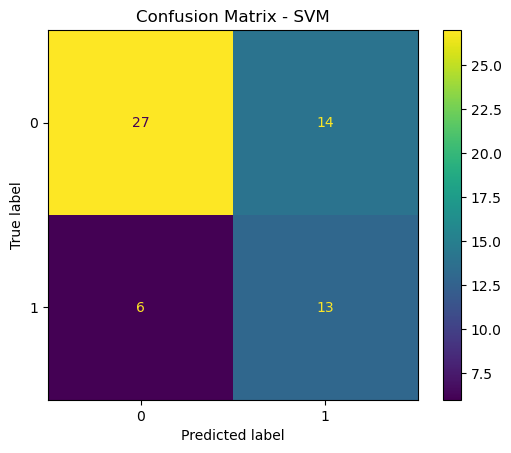

Cross-validated Accuracy (Tuned SVM): 0.822504472271914


In [1496]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm)
plt.title("Confusion Matrix - SVM")
plt.show()

# Cross-validated Accuracy
cv_score_svc = cross_val_score(best_svm, X_resampled_high_importance, y_resampled, cv=5, scoring='accuracy')
print("Cross-validated Accuracy (Tuned SVM):", cv_score_svc.mean())

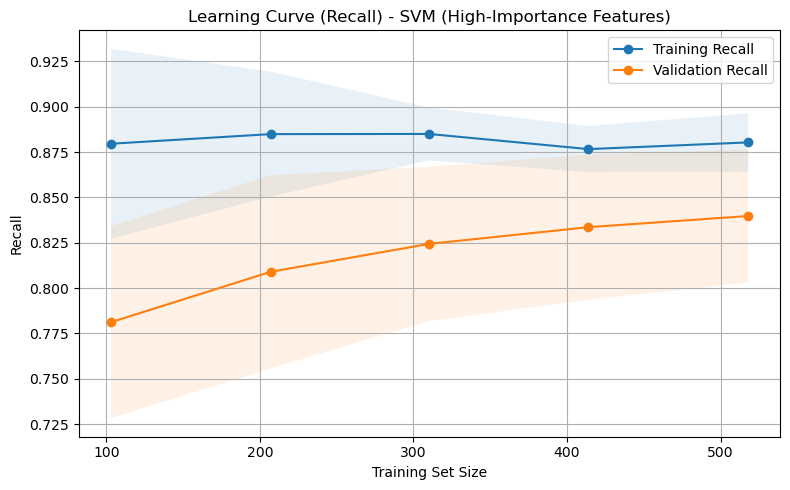

In [1497]:
from sklearn.model_selection import learning_curve
import numpy as np

# === Generate learning curve for SVM ===
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_svm,
    X=X_resampled_high_importance,
    y=y_resampled,
    train_sizes=np.linspace(0.2, 1.0, 5),
    cv=5,
    scoring='recall',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# === Compute mean and std ===
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Recall")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Recall")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.title("Learning Curve (Recall) - SVM (High-Importance Features)")
plt.xlabel("Training Set Size")
plt.ylabel("Recall")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


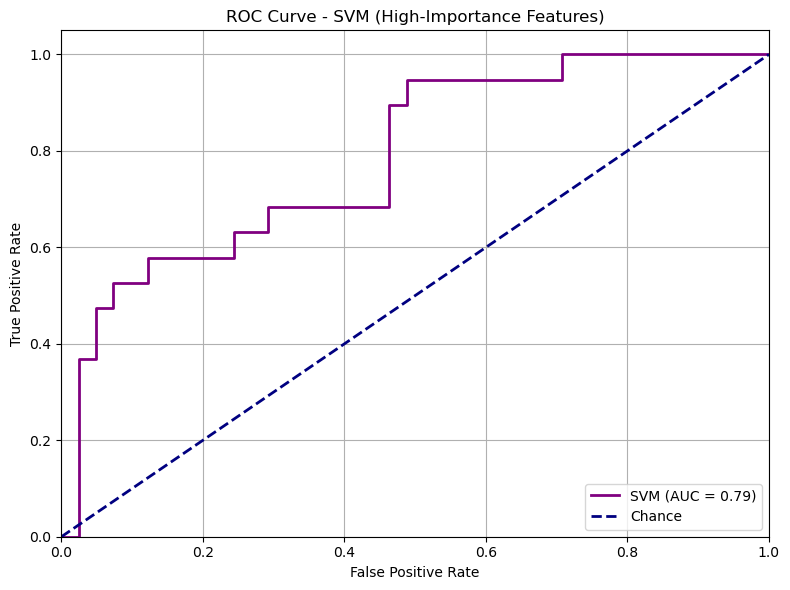

In [1498]:
from sklearn.metrics import roc_curve, auc

# Step 1: Get predicted probabilities for class 1
y_probs_svm = best_svm.predict_proba(X_test_high_importance)[:, 1]

# Step 2: Compute FPR, TPR, thresholds
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (High-Importance Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.0 Result Comparison

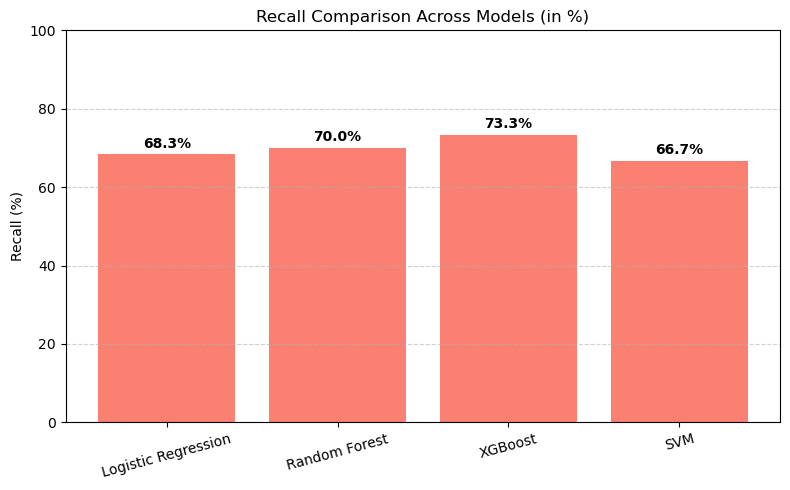

In [1500]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Replace these with your actual prediction variables
# Example:
# y_test_pred_logreg = best_logreg.predict(X_test_high_importance)

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
y_preds = [y_test_pred_logreg, y_test_pred_rf, y_test_pred_xg, y_test_pred_svm]

recall_scores = [recall_score(y_test, y_pred, average='weighted') for y_pred in y_preds]

# Convert recall scores to percentages
recall_percentages = [score * 100 for score in recall_scores]

# Plot the recall scores
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, recall_percentages, color='salmon')

plt.title('Recall Comparison Across Models (in %)')
plt.ylabel('Recall (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=15)

#Add recall % values on top of bars
for bar, recall in zip(bars, recall_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f"{recall:.1f}%", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



In [1501]:
import pandas as pd

# Define the metrics for each model
model_metrics = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM"],
    "Precision": [
        metrics.precision_score(y_test, y_test_pred_logreg, average='weighted'),
        metrics.precision_score(y_test, y_test_pred_rf, average='weighted'),
        metrics.precision_score(y_test, y_test_pred_xg, average='weighted'),
        metrics.precision_score(y_test, y_test_pred_svm, average='weighted')
    ],
    "Recall": [
        metrics.recall_score(y_test, y_test_pred_logreg, average='weighted'),
        metrics.recall_score(y_test, y_test_pred_rf, average='weighted'),
        metrics.recall_score(y_test, y_test_pred_xg, average='weighted'),
        metrics.recall_score(y_test, y_test_pred_svm, average='weighted')
    ],
    "F1-Score": [
        metrics.f1_score(y_test, y_test_pred_logreg, average='weighted'),
        metrics.f1_score(y_test, y_test_pred_rf, average='weighted'),
        metrics.f1_score(y_test, y_test_pred_xg, average='weighted'),
        metrics.f1_score(y_test, y_test_pred_svm, average='weighted')
    ],
    "Accuracy": [
        accuracy_score(y_test, y_test_pred_logreg),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_xg),
        accuracy_score(y_test, y_test_pred_svm)
    ]
}

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(model_metrics)

# Display the table
metrics_df.head()

,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.721078,0.683333,0.693185,0.683333
1,Random Forest,0.709035,0.700000,0.703750,0.700000
2,XGBoost,0.741636,0.733333,0.736667,0.733333
3,SVM,0.711560,0.666667,0.677634,0.666667


## Conclusion

In this notebook, we explored the **Heart Failure Death Event Prediction** using a dataset of clinical features. Below are the key steps and findings:

1. **Data Preprocessing and Exploration**:
    - We analyzed the dataset to understand its structure, feature distributions, and relationships between variables.
    - Outliers were identified and handled appropriately, and skewness in continuous features was addressed using transformations like **Box-Cox** and **Square Transformation** for left-skewed features.

2. **Exploratory Data Analysis (EDA)**:
    - Relationships between features such as **Age**, **Sex**, **Diabetes**, **Smoking**, and **Death Event** were visualized.
    - Imbalanced data distribution was observed, with more survivors than deceased patients.

3. **Feature Selection**:
    - Using **Random Forest Feature Importance**, six key features were identified: **serum_creatinine**, **ejection_fraction**, **platelets**, **creatinine_phosphokinase**, **age**, and **serum_sodium**.
    - These features were prioritized for model training to enhance interpretability and performance.

4. **Handling Imbalanced Data**:
    - **SMOTE (Synthetic Minority Oversampling Technique)** was applied to balance the dataset, reducing the risk of bias in model predictions.

5. **Model Training and Evaluation**:
    - Four models, **Random Forest Classifier**, **Logistic Regression**, **XGBoost**, and **SVM**, were trained and evaluated.
    - Random Forest with SMOTE achieved a recall of **65%**, Logistic Regression with SMOTE achieved a recall of **70%**, XGBoost achieved a recall of **71.7%**, and SVM achieved a recall of **68.3%**.
    - Performance metrics such as **Precision**, **Recall**, and **F1 Score** were used to compare models.

6. **Insights**:
    - The selected features are clinically relevant predictors for mortality in cardiovascular conditions.
    - The imbalanced nature of the dataset highlights the importance of techniques like SMOTE to improve model fairness.
    - Logistic Regression demonstrated the highest recall, making it a strong candidate for predicting heart failure death events.

This workflow demonstrates a comprehensive approach to predicting heart failure death events, combining **data preprocessing**, **feature engineering**, and **model evaluation** to derive meaningful insights and improve predictive accuracy.